<a href="https://colab.research.google.com/github/frank-morales2020/Cloud_curious/blob/master/C6_PAPERBANANA_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dwzhu-pku.github.io/PaperBanana/

In [ ]:
!pip install -q google-generativeai
!pip install -U google-genai

## CASE6

🍌 [Planner Agent]: Identifying decision nodes...


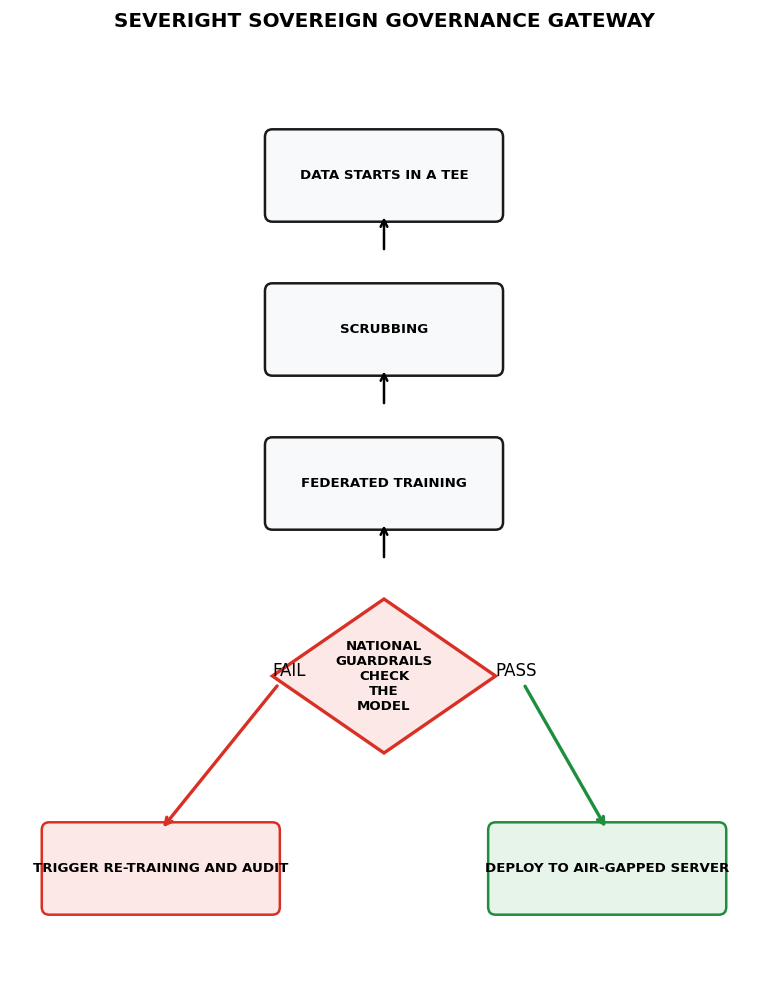

In [ ]:
from google import genai
from google.colab import userdata
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

client = genai.Client(api_key=userdata.get('GEMINI'))

def run_branching_sovereign_ai(text_input):
    print("🍌 [Planner Agent]: Identifying decision nodes...")

    # We ask the LLM specifically for a flow that includes a branch
    prompt = f"""
    Extract the Sovereign AI flow. Identify the 'National Guardrail' step as a decision point.
    Return a JSON object with:
    'steps': [list of steps before the guardrail],
    'decision': 'The guardrail step',
    'success': 'Next step if pass',
    'failure': 'Action if fail'
    Text: {text_input}
    """
    resp = client.models.generate_content(model='gemini-2.0-flash', contents=prompt)
    data = json.loads(resp.text.strip().replace('```json', '').replace('```', ''))

    # --- VISUALIZER ---
    fig, ax = plt.subplots(figsize=(8, 10), dpi=120)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 12)
    ax.axis('off')

    # 1. Draw Initial Steps (Vertical)
    y = 10
    for step in data['steps']:
        ax.add_patch(patches.FancyBboxPatch((3.5, y), 3, 1, boxstyle="round,pad=0.1", ec="#1a1a1a", fc="#f8f9fa", lw=1.5))
        ax.text(5, y + 0.5, step.upper(), ha='center', va='center', fontweight='bold', fontsize=8)
        ax.annotate('', xy=(5, y), xytext=(5, y-0.5), arrowprops=dict(arrowstyle='->', lw=1.5))
        y -= 2

    # 2. Draw Decision Diamond (The Guardrail)
    diamond_pts = [[5, y+1], [6.5, y], [5, y-1], [3.5, y]]
    ax.add_patch(patches.Polygon(diamond_pts, ec="#d93025", fc="#fce8e6", lw=2))
    ax.text(5, y, data['decision'].upper().replace(" ", "\n"), ha='center', va='center', fontweight='bold', fontsize=8)

    # 3. Draw Success Branch (Right then Down)
    ax.annotate('PASS', xy=(8, y-2), xytext=(6.5, y), arrowprops=dict(arrowstyle='->', color='#1e8e3e', lw=2))
    ax.add_patch(patches.FancyBboxPatch((6.5, y-3), 3, 1, boxstyle="round,pad=0.1", ec="#1e8e3e", fc="#e6f4ea", lw=1.5))
    ax.text(8, y-2.5, data['success'].upper(), ha='center', va='center', fontweight='bold', fontsize=8)

    # 4. Draw Failure Branch (Left then Down)
    ax.annotate('FAIL', xy=(2, y-2), xytext=(3.5, y), arrowprops=dict(arrowstyle='->', color='#d93025', lw=2))
    ax.add_patch(patches.FancyBboxPatch((0.5, y-3), 3, 1, boxstyle="round,pad=0.1", ec="#d93025", fc="#fce8e6", lw=1.5))
    ax.text(2, y-2.5, data['failure'].upper(), ha='center', va='center', fontweight='bold', fontsize=8)

    plt.title("SEVERIGHT SOVEREIGN GOVERNANCE GATEWAY", fontsize=12, fontweight='bold', pad=20)
    plt.show()

# --- RUN ---
severight_text = "Data starts in a TEE, followed by scrubbing and federated training. Then, national guardrails check the model. If it passes, deploy to air-gapped server. If it fails, trigger re-training and audit."
run_branching_sovereign_ai(severight_text)